In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [54]:
m = nn.Linear(20, 30) # matrix
input = torch.randn(128, 20) # vector
# print(input)
output = m(input)
print(output.size())

torch.Size([128, 30])


In [55]:
# step 1: data
a1= torch.tensor([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], dtype=torch.float32, requires_grad=True)
a2= torch.randint(40,60,size=(20,), dtype=torch.float32, requires_grad=True)
a1

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20.], requires_grad=True)

In [56]:
a2

tensor([49., 58., 43., 57., 55., 58., 47., 48., 53., 41., 56., 49., 53., 47.,
        53., 41., 54., 52., 50., 54.], requires_grad=True)

In [57]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Random values between 0 and 10
Y = 3 * X + 5 + np.random.normal(0, 2, (100, 1))  # y = 3x + 5 + noise

# Convert numpy arrays to torch tensors
X_train = torch.tensor(X, dtype=torch.float32)
Y_train = torch.tensor(Y, dtype=torch.float32)


Epoch 0: Loss = 292.4022
Epoch 100: Loss = 5.2622
Epoch 200: Loss = 3.8956
Epoch 300: Loss = 3.4464
Epoch 400: Loss = 3.2987
Epoch 500: Loss = 3.2501
Epoch 600: Loss = 3.2342
Epoch 700: Loss = 3.2289
Epoch 800: Loss = 3.2272
Epoch 900: Loss = 3.2266


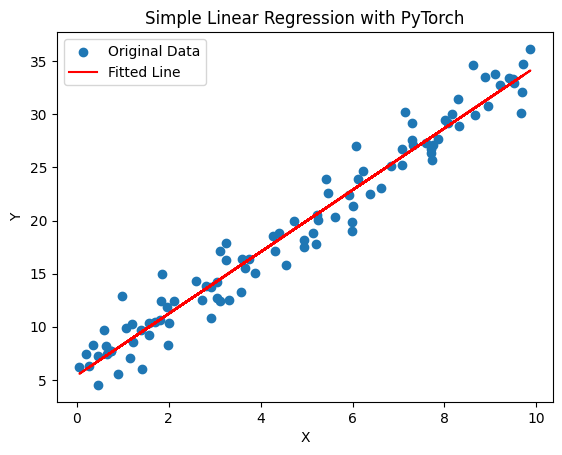

In [58]:
# Define a simple neural network model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input and one output neuron

    def forward(self, x):
        return self.linear(x)

# Initialize model, loss function, and optimizer
model = LinearRegressionModel()
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

# Training loop
epochs = 1000
for epoch in range(epochs):
    # model.train()
    
    # Forward pass
    predictions = model(X_train)

    # loss calculation
    loss = criterion(predictions, Y_train)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# Plot results
with torch.no_grad():
    Y_pred = model(X_train).numpy()

plt.scatter(X, Y, label="Original Data")
plt.plot(X, Y_pred, color='red', label="Fitted Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Simple Linear Regression with PyTorch")
plt.show()

In [59]:
import torch 
import matplotlib.pyplot as plt
import torch.nn as nn

In [60]:
t1=torch.tensor([1,2,3,4,5,6,7,8,9,10], dtype=torch.float32).reshape(10,1)
t2=torch.randint(20, 50, (10,1), dtype=torch.float32)
t1

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]])

In [61]:
class linearReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(1,1)

    def forward(self, x):
        return self.linear(x)
    
# this will give me [y=mx+c]

'''
nn.Linear(1, 1) means one input feature and one output feature.
This defines a single neuron with:
- One weight (w)
- One bias (b)

The equation it learns is: y=w⋅x+b

Since there is only one output and no hidden layers, this acts as a single neuron performing a linear transformation.
Neuron View in a Neural Network:
- A neuron takes an input, applies a weight, adds a bias, and passes it to an activation function.
- Here, since no activation function is used, it's a pure linear neuron.'
'''

print("")

In [62]:
model=linearReg()
loss=nn.MSELoss()
optimizer=torch.optim.SGD(params=model.parameters(), lr=0.01)

In [63]:
epochs=1000
for epoch in range(epochs):
    
    # forward pass
    Y_pred = model.forward(t1)
    if epoch % 100 == 0:
        print(Y_pred)

    # loss calculation
    l=loss(Y_pred, t2)

    # backward pass
    optimizer.zero_grad()  # Reset gradients
    l.backward()  # Compute gradients

    # gradients update
    optimizer.step()  # Update model parameters

    # print
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss - {l.item():.4f}")

tensor([[-0.2515],
        [-0.7194],
        [-1.1873],
        [-1.6552],
        [-2.1231],
        [-2.5910],
        [-3.0590],
        [-3.5269],
        [-3.9948],
        [-4.4627]], grad_fn=<AddmmBackward0>)
Epoch 0: Loss - 1672.4265
tensor([[17.3599],
        [20.6499],
        [23.9400],
        [27.2301],
        [30.5202],
        [33.8103],
        [37.1003],
        [40.3904],
        [43.6805],
        [46.9706]], grad_fn=<AddmmBackward0>)
Epoch 100: Loss - 224.7384
tensor([[24.6934],
        [26.7534],
        [28.8134],
        [30.8734],
        [32.9334],
        [34.9934],
        [37.0534],
        [39.1134],
        [41.1734],
        [43.2334]], grad_fn=<AddmmBackward0>)
Epoch 200: Loss - 148.9478
tensor([[29.5078],
        [30.7603],
        [32.0127],
        [33.2652],
        [34.5177],
        [35.7701],
        [37.0226],
        [38.2750],
        [39.5275],
        [40.7799]], grad_fn=<AddmmBackward0>)
Epoch 300: Loss - 116.2831
tensor([[32.6685],
      

(10, 1)


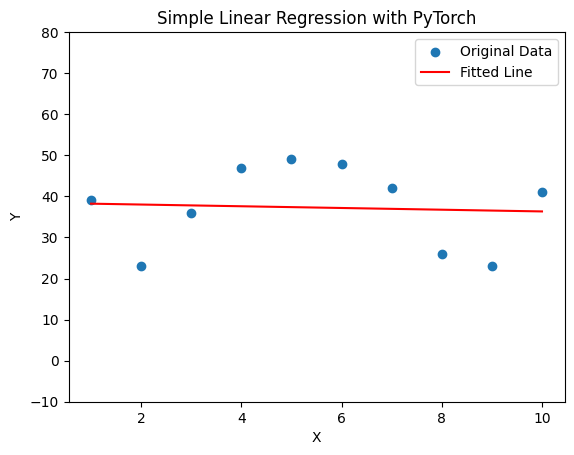

In [64]:
# Plot results
with torch.no_grad():
    Y_pred = model(t1).numpy()

print(Y_pred.shape)

a1=t1.numpy()
a2=t2.numpy()
plt.scatter(t1, t2, label="Original Data")
plt.plot(t1, Y_pred, color='red', label="Fitted Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Simple Linear Regression with PyTorch")
plt.ylim(-10, 80)
plt.show()

Epoch 0: Loss = 1.1005
Epoch 100: Loss = 1.0509
Epoch 200: Loss = 1.0177
Epoch 300: Loss = 0.9954
Epoch 400: Loss = 0.9805
Epoch 500: Loss = 0.9704
Epoch 600: Loss = 0.9637
Epoch 700: Loss = 0.9592
Epoch 800: Loss = 0.9562
Epoch 900: Loss = 0.9541


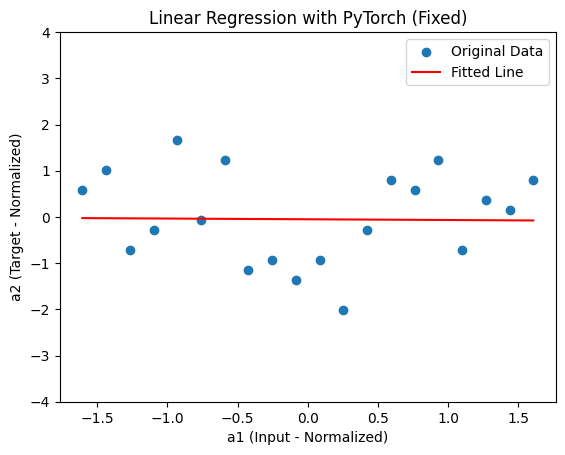

In [65]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the input (X) and output (Y) properly
a1 = torch.tensor([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], dtype=torch.float32).view(-1, 1)
a2 = torch.randint(40, 60, size=(20,), dtype=torch.float32).view(-1, 1)

# Normalize data (optional but helpful)
a1 = (a1 - a1.mean()) / a1.std()  # Standardizing input
a2 = (a2 - a2.mean()) / a2.std()  # Standardizing output

# Define a simple linear model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input, one output

    def forward(self, x):
        return self.linear(x)

# Initialize model, loss function, and optimizer
model = LinearRegressionModel()
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.SGD(model.parameters(), lr=0.001)  # Reduced learning rate

# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()
    
    # Forward pass
    predictions = model(a1)
    loss = criterion(predictions, a2)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# Make predictions
with torch.no_grad():
    Y_pred = model(a1)

# Plot results
plt.scatter(a1.numpy(), a2.numpy(), label="Original Data")
plt.plot(a1.numpy(), Y_pred.numpy(), color='red', label="Fitted Line")
plt.xlabel("a1 (Input - Normalized)")
plt.ylabel("a2 (Target - Normalized)")
plt.legend()
plt.title("Linear Regression with PyTorch (Fixed)")
plt.ylim(-4,4)
plt.show()
